# Project: Human Resources Dataset Analysis

## Week 3: Data PreProcessing And ML Model:

In the third week of this project, the focus shifts to Data Preprocessing, Machine Learning Model Selection, and Model Training, Validation, and Testing. This phase is crucial for building predictive models that can help understand and forecast employee retention.

# Model Variables Description for Predicting Employee Attrition

## Categorical Variables

| Variable                  | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| **E.Gender**              | The gender of the employee (e.g., Male, Female).                           |
| **E.BusinessTravel**      | Frequency of business travel (e.g., Rarely, Frequently).                   |
| **E.Department**          | The department in which the employee works (e.g., Sales, HR).              |
| **E.State**               | The state in which the employee is located.                                 |
| **E.Ethnicity**           | The employee's ethnicity.                                                   |
| **E.EducationField**      | The employee's field of education (e.g., Engineering, Human Resources).    |
| **E.JobRole**             | The specific job role of the employee (e.g., Manager, Sales Executive).    |
| **E.MaritalStatus**       | The marital status of the employee (e.g., Single, Married).                |
| **E.OverTime**            | Whether the employee works overtime (Yes/No).                               |

## Continuous Variables

| Variable                     | Description                                                             |
|------------------------------|-------------------------------------------------------------------------|
| **E.HireDate**               | The date the employee was hired.                                        |
| **E.Age**                    | The age of the employee.                                               |
| **E.DistanceFromHome**       | The distance from the employee’s home to the office.                   |
| **E.Education**              | The level of education achieved by the employee (e.g., High School).  |
| **E.Salary**                 | The employee’s salary.                                                |
| **E.StockOptionLevel**       | The level of stock options offered to the employee.                   |
| **E.YearsAtCompany**         | The number of years the employee has been with the company.            |
| **E.YearsInMostRecentRole**  | The number of years the employee has spent in their current role.      |
| **E.YearsSinceLastPromotion**| The number of years since the employee's last promotion.               |
| **E.YearsWithCurrManager**   | The number of years the employee has worked with their current manager. |

## Performance Review Variables

| Variable                                   | Description                                                             |
|--------------------------------------------|-------------------------------------------------------------------------|
| **PR.ReviewDate**                          | The date of the most recent performance review.                        |
| **PR.EnvironmentSatisfaction**             | Employee satisfaction with the work environment (scale 1-5).          |
| **PR.JobSatisfaction**                     | Employee satisfaction with their job role (scale 1-5).                |
| **PR.RelationshipSatisfaction**           | Satisfaction with relationships at work (scale 1-5).                  |
| **PR.TrainingOpportunitiesWithinYear**    | Number of training opportunities offered within the last year.         |
| **PR.TrainingOpportunitiesTaken**          | The number of training opportunities the employee has taken.          |
| **PR.WorkLifeBalance**                     | Work-life balance rating (scale 1-5).                                 |
| **PR.SelfRating**                          | The employee's self-evaluation score.                                  |
| **PR.ManagerRating**                       | The employee's performance rating given by their manager.              |

## Target Variable

| Variable                  | Description                                                              |
|---------------------------|--------------------------------------------------------------------------|
| **`E.Attrition`**          | The target variable indicating whether the employee has left the company (Yes/No). |


In [1]:
# import Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set(rc={'figure.figsize': [15,8]}, font_scale=1.2)


In [2]:
import pyodbc
import pandas as pd


def read_sql_query(query):
    
    server = 'DESKTOP-0CQ5N9B' 
    database = 'HR_system' 
    
    # SQL Authentication
    connection_string = (
        f"Driver={{ODBC Driver 17 for SQL Server}};" 
        f"Server={server};" 
        f"Database={database};"
        f"Trusted_Connection=yes;" 
    )

    # Creating connection
    try:
        connection = pyodbc.connect(connection_string) 
        print("Connection successful!")

        # Use cursor to execute query
        cursor = connection.cursor()
        cursor.execute(query)
        
        # Get results
        rows = cursor.fetchall()
        columns = [column[0] for column in cursor.description] 
        
        # Creating DataFrame
        df = pd.DataFrame.from_records(rows, columns=columns)

        return df

    except Exception as e:
        print(f"Error: {e}")
        return None  
    
    finally:
        # close connection
        connection.close()



In [3]:
query="""
SELECT 
    E.Gender,
    E.BusinessTravel,
    E.Department,
    E.State,
    E.Ethnicity,
    E.EducationField,
    E.JobRole,
    E.MaritalStatus,
    E.OverTime,

    E.HireDate,
    E.Age,  
    E.DistanceFromHome,    
    E.Education,
    E.Salary,
    E.StockOptionLevel,
    E.YearsAtCompany,
    E.YearsInMostRecentRole,
    E.YearsSinceLastPromotion,
    E.YearsWithCurrManager,

    PR.ReviewDate,
    PR.EnvironmentSatisfaction,
    PR.JobSatisfaction,
    PR.RelationshipSatisfaction,
    PR.TrainingOpportunitiesWithinYear,
    PR.TrainingOpportunitiesTaken,
    PR.WorkLifeBalance, 
    PR.SelfRating,
    PR.ManagerRating,

    E.Attrition --Target

FROM 
    Employees E
LEFT JOIN 
    PerformanceRating PR ON E.EmployeeID = PR.EmployeeID;

"""


# Employees

In [51]:
pth= "../00-Dataset_Data_Model/"
#df_employees = pd.read_csv(f"{pth}06-All_Data_Employees.csv")

## Load Dataset 
df = read_sql_query(query)

df.head()

Connection successful!


,Gender,BusinessTravel,Department,State,Ethnicity,EducationField,JobRole,MaritalStatus,OverTime,HireDate,Age,DistanceFromHome,Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,Attrition
0,Male,Some Travel,Technology,CA,White,Information Systems,Software Engineer,Married,No,2021-09-05,22,40,4,27763.0,0,1,0,1,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,Non-Binary,Frequent Traveller,Sales,CA,White,Marketing,Sales Executive,Married,No,2017-08-26,24,17,4,56155.0,1,5,2,2,0,2020-06-17,3.0,3.0,2.0,1.0,2.0,2.0,4.0,3.0,No
2,Non-Binary,Frequent Traveller,Sales,CA,White,Marketing,Sales Executive,Married,No,2017-08-26,24,17,4,56155.0,1,5,2,2,0,2021-06-17,4.0,4.0,5.0,1.0,1.0,5.0,3.0,3.0,No
3,Non-Binary,Frequent Traveller,Sales,CA,White,Marketing,Sales Executive,Married,No,2017-08-26,24,17,4,56155.0,1,5,2,2,0,2022-06-17,3.0,4.0,5.0,3.0,0.0,4.0,4.0,4.0,No
4,Male,Some Travel,Technology,CA,Black or African American,Computer Science,Machine Learning Engineer,Married,No,2012-03-08,30,6,2,126238.0,0,10,3,6,6,2022-06-18,4.0,5.0,5.0,1.0,2.0,4.0,4.0,4.0,No


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Gender                           6899 non-null   object        
 1   BusinessTravel                   6899 non-null   object        
 2   Department                       6899 non-null   object        
 3   State                            6899 non-null   object        
 4   Ethnicity                        6899 non-null   object        
 5   EducationField                   6899 non-null   object        
 6   JobRole                          6899 non-null   object        
 7   MaritalStatus                    6899 non-null   object        
 8   OverTime                         6899 non-null   object        
 9   HireDate                         6899 non-null   datetime64[ns]
 10  Age                              6899 non-null   int64      

# **Data Preprocessing**

In [15]:

# Drop original datetime columns if they are no longer needed
df.drop(columns=['HireDate','ReviewDate'], inplace=True)

# categorical_columns
categorical_columns = ["Gender", "BusinessTravel", "Department", "State", "Ethnicity", 
                        "EducationField", "JobRole", "MaritalStatus", "OverTime","Attrition"]

#  get_dummies
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        6899 non-null   int64  
 1   DistanceFromHome                           6899 non-null   int64  
 2   Education                                  6899 non-null   int64  
 3   Salary                                     6899 non-null   float64
 4   StockOptionLevel                           6899 non-null   int64  
 5   YearsAtCompany                             6899 non-null   int64  
 6   YearsInMostRecentRole                      6899 non-null   int64  
 7   YearsSinceLastPromotion                    6899 non-null   int64  
 8   YearsWithCurrManager                       6899 non-null   int64  
 9   EnvironmentSatisfaction                    6709 non-null   float64
 10  JobSatisfaction         

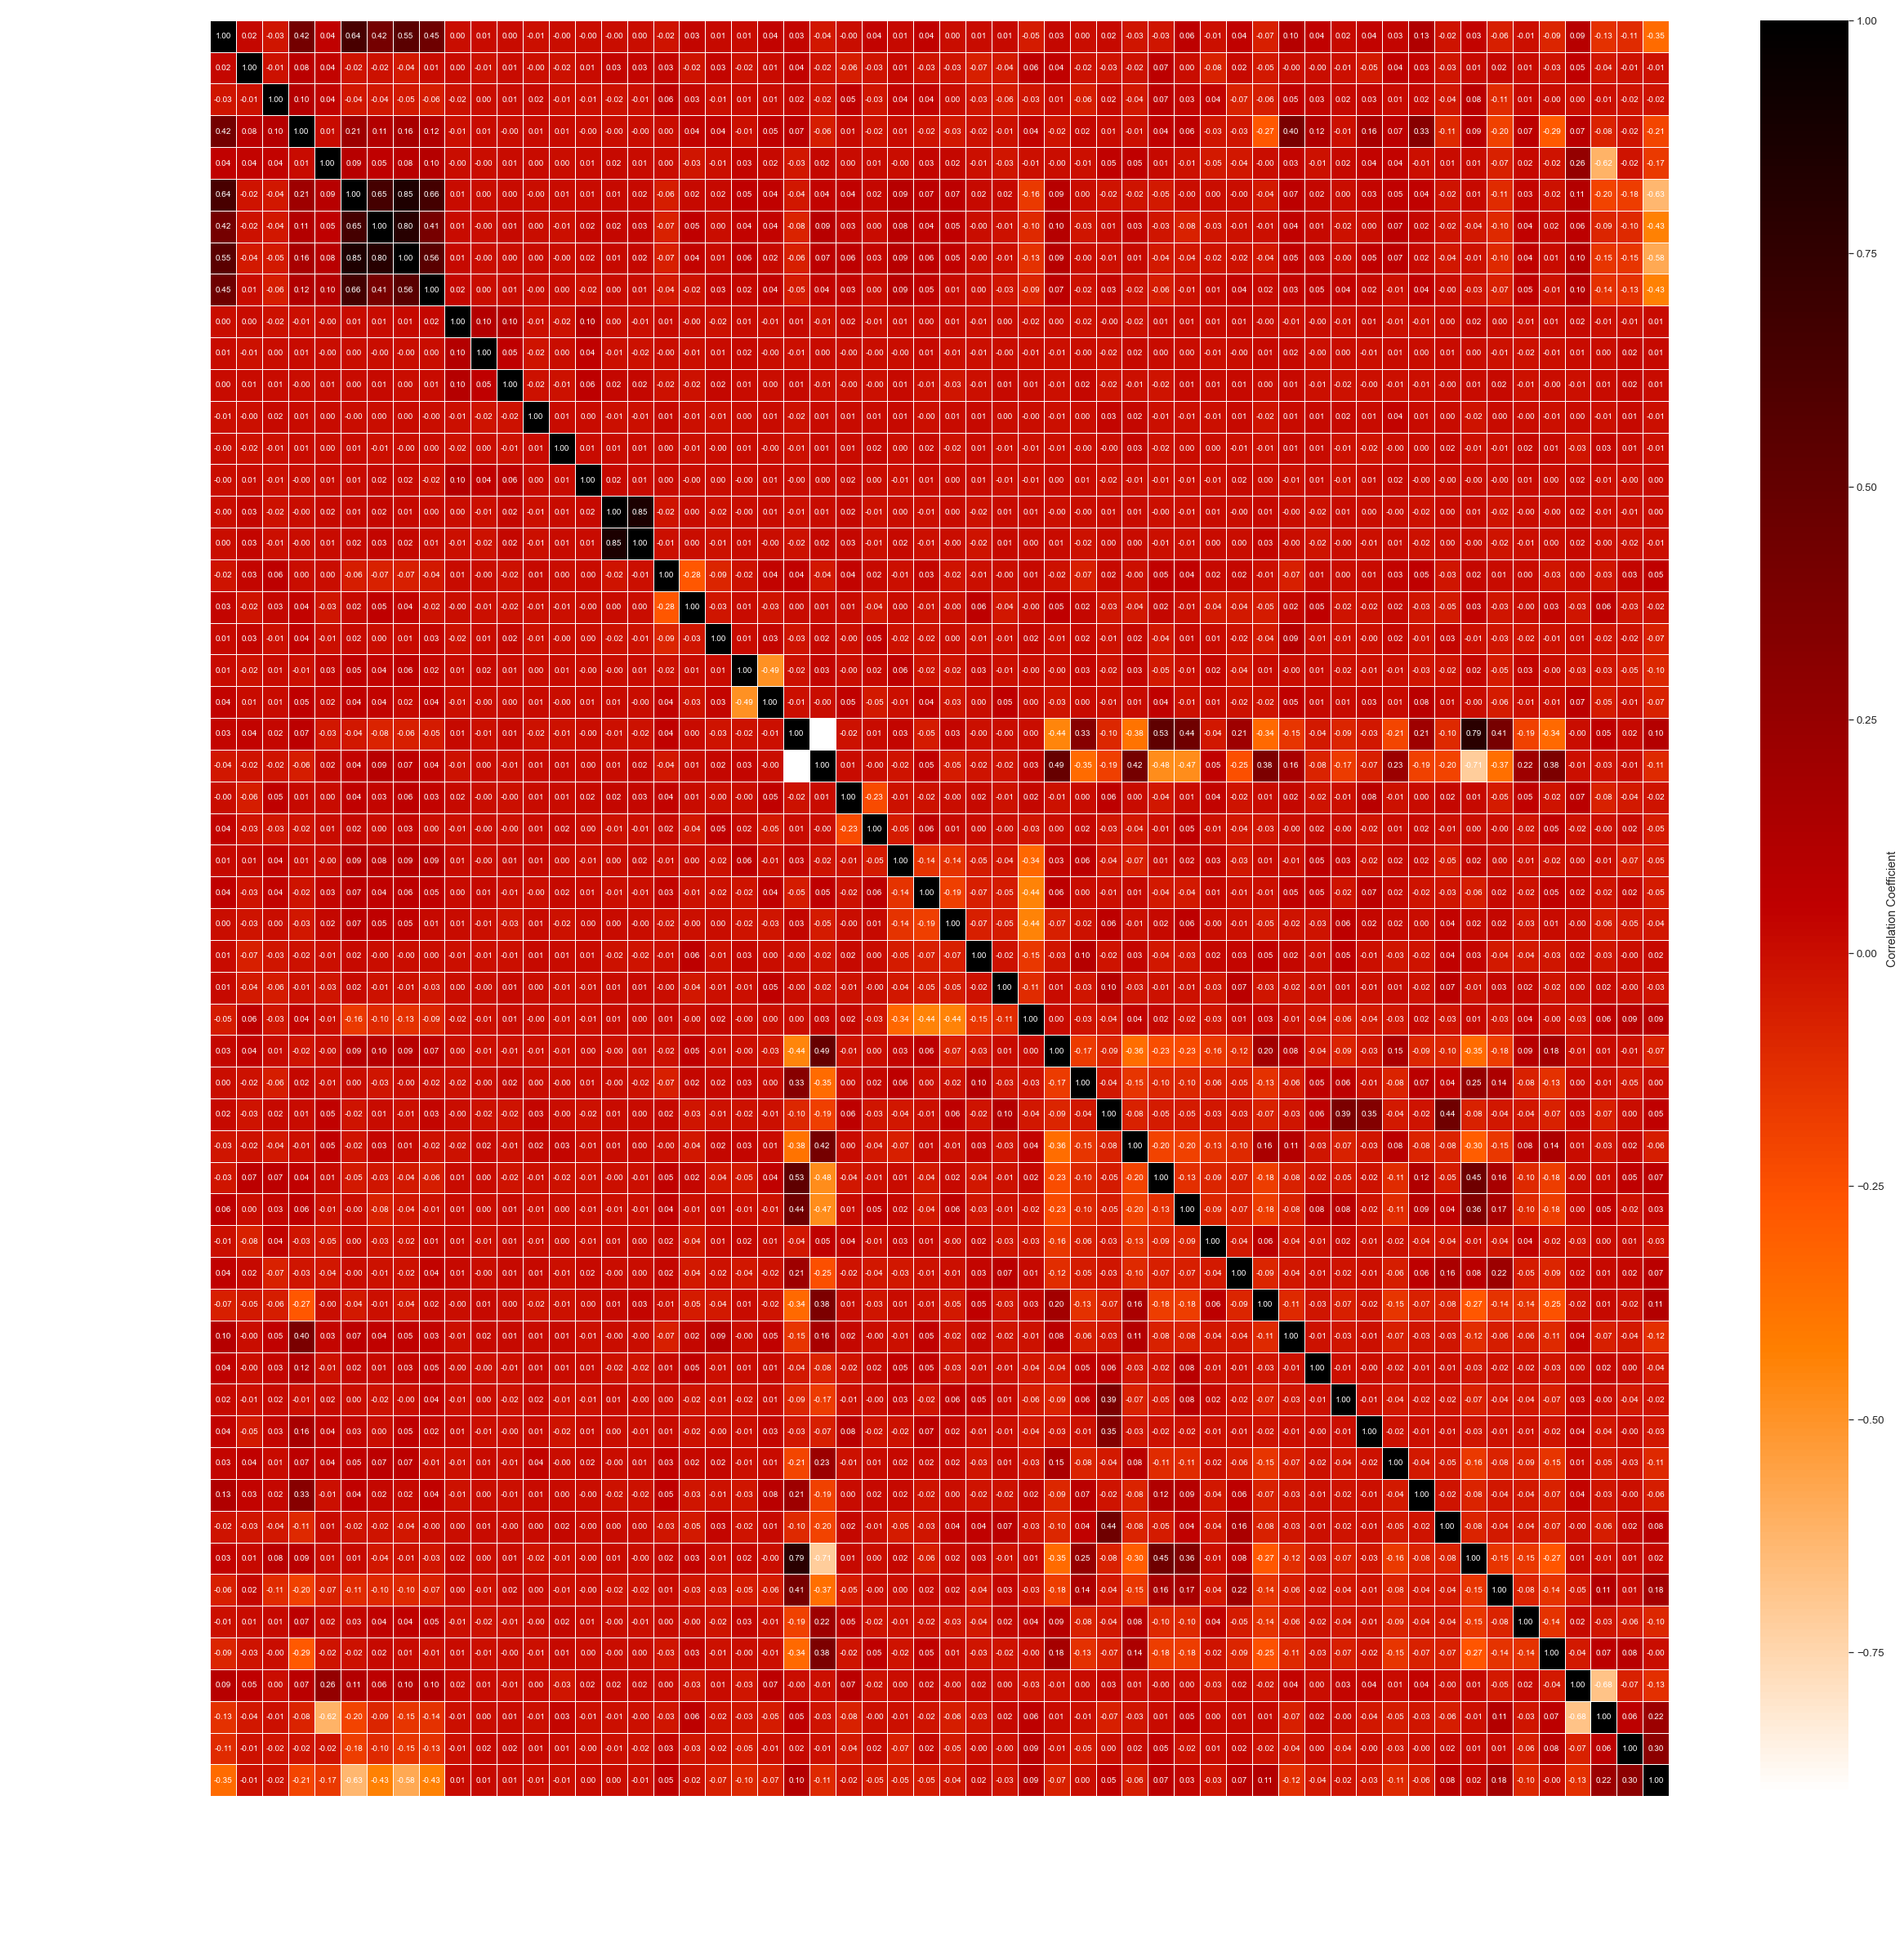

In [16]:
# Calculate the correlation matrix
correlation_matrix = df_dummies.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(40, 40))  # Set the figure size

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="gist_heat_r", fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'}, 
            xticklabels=correlation_matrix.columns,  # Ensure column names are shown
            yticklabels=correlation_matrix.columns,  # Ensure row names are shown
            annot_kws={'size': 10, 'color': 'white'})  # Set annotation text color to white

# Rotate x and y tick labels to italic and set their rotation
plt.xticks(rotation=45, ha='right', fontstyle='italic', color='white')  # Rotate x labels and set to italic
plt.yticks(rotation=0, fontstyle='italic', color='white')  # Set y labels to italic

# Add a title to the heatmap
plt.title("Correlation Heatmap of Categorical Variables", fontsize=16, color='white')  # Set title color to white

# Save the figure
plt.savefig("correlation_heatmap.png", bbox_inches='tight', dpi=300)  # Save with specified dpi

# Show the heatmap
plt.show()

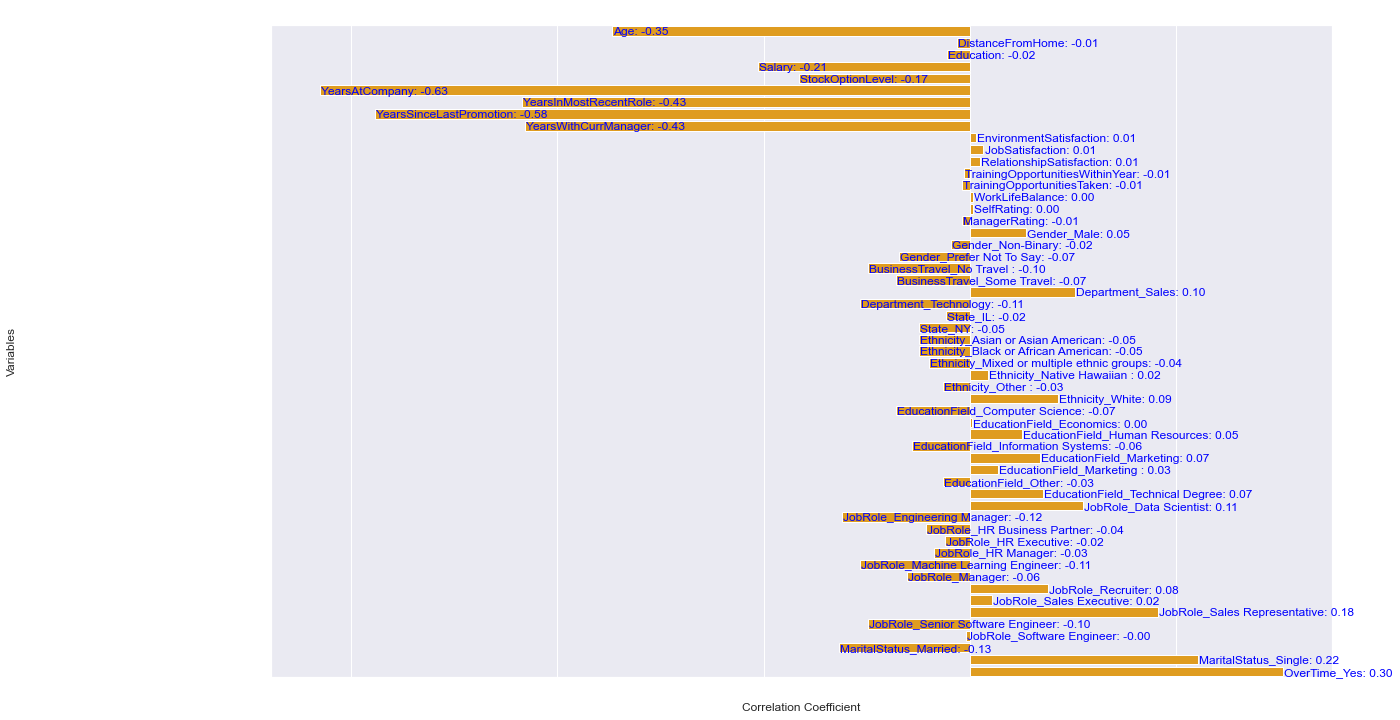

In [17]:
# Calculate the correlation with Attrition_Yes and drop the Attrition_Yes column itself
correlation_with_attrition = df_dummies.corr()["Attrition_Yes"].drop("Attrition_Yes")

# Set up the figure for the horizontal bar plot
plt.figure(figsize=(19, 12))  # Set the figure size

# Create the horizontal bar plot with a solid color
sns.barplot(y=correlation_with_attrition.index, x=correlation_with_attrition.values, color="orange")

# Add titles to the axes
plt.ylabel("Variables", fontsize=12)  # Y-axis label
plt.xlabel("Correlation Coefficient", fontsize=12)  # X-axis label
plt.title("Correlation of Categorical Variables with Attrition", fontsize=16, color='white')  # Title of the bar plot

# Set y-ticks to italic
plt.yticks(fontstyle='italic', color='white')  # Set y labels to italic and white
plt.xticks(fontstyle='italic', color='white')  # Set x labels to italic

# Display the variable names with correlation values next to the bars
for index, value in enumerate(correlation_with_attrition.values):
    plt.text(value+0.001, index, f"{correlation_with_attrition.index[index]}: {value:.2f}", 
             ha='left', va='center_baseline', fontsize=12, color='blue')  # Add text next to the bars with variable names and values


# Save the figure
plt.savefig("correlation_bar_plot_horizontal.png", bbox_inches='tight', dpi=300)  # Save the plot

# Show the horizontal bar plot
plt.show()


In [18]:
# Create a list of variables with correlation greater than 0.1 or less than -0.1
significant_variables = correlation_with_attrition[(correlation_with_attrition >= 0.1) | (correlation_with_attrition <= -0.1)]

# Convert to list
significant_variables_list = significant_variables.index.tolist()

significant_variables_list

['Age',
 'Salary',
 'StockOptionLevel',
 'YearsAtCompany',
 'YearsInMostRecentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Department_Sales',
 'Department_Technology',
 'JobRole_Data Scientist',
 'JobRole_Engineering Manager',
 'JobRole_Machine Learning Engineer',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_Yes']

In [31]:
df_ml=df_dummies[significant_variables_list+["Attrition_Yes"]]

df_ml.head()

,Age,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Sales,Department_Technology,JobRole_Data Scientist,JobRole_Engineering Manager,JobRole_Machine Learning Engineer,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,22,27763.0,0,1,0,1,0,False,True,False,False,False,False,True,False,False,False
1,24,56155.0,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
2,24,56155.0,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
3,24,56155.0,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
4,30,126238.0,0,10,3,6,6,False,True,False,False,True,False,True,False,False,False


In [27]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6899 non-null   int64  
 1   Salary                             6899 non-null   float64
 2   StockOptionLevel                   6899 non-null   int64  
 3   YearsAtCompany                     6899 non-null   int64  
 4   YearsInMostRecentRole              6899 non-null   int64  
 5   YearsSinceLastPromotion            6899 non-null   int64  
 6   YearsWithCurrManager               6899 non-null   int64  
 7   Department_Sales                   6899 non-null   bool   
 8   Department_Technology              6899 non-null   bool   
 9   JobRole_Data Scientist             6899 non-null   bool   
 10  JobRole_Engineering Manager        6899 non-null   bool   
 11  JobRole_Machine Learning Engineer  6899 non-null   bool 


| **Column Name**                      | **Description**                                                                                                              | **Correlation with Attrition_Yes** |
|--------------------------------------|------------------------------------------------------------------------------------------------------------------------------|-------------------------------------|
| **Age**                              | The age of the employee. Younger employees may have different job expectations compared to older employees.                 | -0.347087                           |
| **Salary**                           | The annual salary of the employee. Higher salaries might correlate with lower attrition rates due to financial satisfaction.  | -0.205315                           |
| **StockOptionLevel**                 | The level of stock options granted to the employee, which may influence their loyalty to the company.                        | -0.165969                           |
| **YearsAtCompany**                  | The total number of years the employee has worked at the company. Longer tenure often correlates with lower attrition rates. | -0.630678                           |
| **YearsInMostRecentRole**           | The number of years the employee has been in their current role. More years in a role might indicate satisfaction or burnout. | -0.434773                           |
| **YearsSinceLastPromotion**         | The number of years since the employee was last promoted. Longer durations may lead to dissatisfaction and higher attrition.  | -0.577255                           |
| **YearsWithCurrManager**            | The total years spent under the current manager. A good relationship with management may reduce attrition.                   | -0.431820                           |
| **ReviewDate**                      | The date of the most recent performance review. Recent reviews may correlate with employee satisfaction and retention.         | 0.101915                            |
| **Department_Sales**                | A binary indicator (True/False) if the employee works in the Sales department. This department may have different turnover rates. | 0.102166                            |
| **Department_Technology**           | A binary indicator if the employee works in the Technology department. This can indicate a different culture and job satisfaction. | -0.106946                           |
| **JobRole_Data Scientist**           | A binary indicator if the employee's job role is Data Scientist. Different roles may have different job satisfaction levels. | 0.109752                            |
| **JobRole_Engineering Manager**     | A binary indicator if the employee's job role is Engineering Manager. The nature of managerial roles may affect attrition.   | -0.123720                           |
| **JobRole_Machine Learning Engineer**| A binary indicator if the employee's job role is Machine Learning Engineer. Role satisfaction may vary by job type.          | -0.106375                           |
| **JobRole_Sales Representative**    | A binary indicator if the employee is a Sales Representative. Sales roles may have unique pressures affecting turnover.       | 0.182392                            |
| **MaritalStatus_Married**           | A binary indicator if the employee is married. Personal life can influence job satisfaction and retention rates.             | -0.127256                           |
| **MaritalStatus_Single**            | A binary indicator if the employee is single. Single employees may have different job priorities and satisfaction levels.    | 0.221311                            |
| **OverTime_Yes**                    | A binary indicator if the employee works overtime. Increased overtime may correlate with job dissatisfaction and attrition.  | 0.304218                            |
| **Attrition_Yes**                   | Target variable indicating if the employee has left the company (Yes/No). This variable is the main focus of the analysis.  | -                                   |


# **Model ML**

In [28]:
df_ml.head()

,Age,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Sales,Department_Technology,JobRole_Data Scientist,JobRole_Engineering Manager,JobRole_Machine Learning Engineer,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,22,27763.0,0,1,0,1,0,False,True,False,False,False,False,True,False,False,False
1,24,56155.0,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
2,24,56155.0,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
3,24,56155.0,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
4,30,126238.0,0,10,3,6,6,False,True,False,False,True,False,True,False,False,False


In [34]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()

# Fit and transform the standard scaler
df_ml.iloc[:,[0,1]]=standard_scaler.fit_transform(df_ml.iloc[:,[0,1]])


In [35]:
df_ml.head()

,Age,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Sales,Department_Technology,JobRole_Data Scientist,JobRole_Engineering Manager,JobRole_Machine Learning Engineer,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,-1.077409,-0.844694,0,1,0,1,0,False,True,False,False,False,False,True,False,False,False
1,-0.826969,-0.556218,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
2,-0.826969,-0.556218,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
3,-0.826969,-0.556218,1,5,2,2,0,True,False,False,False,False,False,True,False,False,False
4,-0.075651,0.155858,0,10,3,6,6,False,True,False,False,True,False,True,False,False,False


In [36]:
# Define features and target variable
X = df_ml.drop(columns=['Attrition_Yes'])  # Feature variables
y = df_ml['Attrition_Yes']  # Target variable

# Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_valid.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 4829
Validation set size: 1035
Testing set size: 1035


In [38]:
models={
    'LR':LogisticRegression(max_iter=200),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'RF':RandomForestClassifier(),
}

# Dictionary to store model performance
model_performance = {}

# Training and validating each model
for name, model in models.items():
    print(f'---------------------')
    print(f'\nUsing {name} model:')
    
    # Fit the model
    model.fit(X_train, y_train.values.ravel())
    
    # Validate the model
    y_valid_pred = model.predict(X_valid)
    
    # Calculate and print training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    print(f'Training Accuracy: {train_accuracy:.4f}')
    
    # Calculate and print validation accuracy
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    print(f'Validation Accuracy: {valid_accuracy:.4f}')
    
    # Store the performance
    model_performance[name] = valid_accuracy






---------------------

Using LR model:
Training Accuracy: 0.8536
Validation Accuracy: 0.8744
---------------------

Using KNN model:


Training Accuracy: 0.9638
Validation Accuracy: 0.9614
---------------------

Using DT model:
Training Accuracy: 1.0000
Validation Accuracy: 0.9903
---------------------

Using SVC model:


Training Accuracy: 0.8648
Validation Accuracy: 0.8908
---------------------

Using NB model:
Training Accuracy: 0.7991
Validation Accuracy: 0.8300
---------------------

Using RF model:


Training Accuracy: 1.0000
Validation Accuracy: 0.9913


No

In [40]:
# Display model performance
performance_df = pd.DataFrame(model_performance.items(), columns=['Model', 'Validation Accuracy'])
performance_df = performance_df.sort_values(by='Validation Accuracy', ascending=False)
print(performance_df)


  Model  Validation Accuracy
5    RF             0.991304
2    DT             0.990338
1   KNN             0.961353
3   SVC             0.890821
0    LR             0.874396
4    NB             0.829952


Yes

In [41]:
# Assuming Random Forest (RF) is the best model based on validation accuracy
# KNN
best_model_name = performance_df.iloc[0]['Model']
best_model = models[best_model_name]

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Test the model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy of {best_model_name}: {test_accuracy:.4f}")


Test Accuracy of RF: 0.9884


Yes

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

       False       1.00      0.98      0.99       696
        True       0.97      1.00      0.98       339

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



## Save Model.

In [57]:
import joblib

# Save the best model,features ,and scaler to a .h5 file
joblib.dump(best_model, './APP/best_model.h5')

features=X.columns
joblib.dump(features, './APP/Afeatures.h5')
joblib.dump(standard_scaler, './APP/scaler.h5')


['./APP/scaler.h5']

__________________________

## APP

In [58]:
import joblib
import numpy as np

model=joblib.load('./APP/best_model.h5')

features=joblib.load('./APP/features.h5')
scaler=joblib.load('./APP/scaler.h5')

In [59]:
len(features)
features

Index(['Age', 'Salary', 'StockOptionLevel', 'YearsAtCompany',
       'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_Sales', 'Department_Technology',
       'JobRole_Data Scientist', 'JobRole_Engineering Manager',
       'JobRole_Machine Learning Engineer', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [1]:
import joblib
import numpy as np
import pandas as pd

# Load the model, features, and scaler
model = joblib.load('./App/best_model.h5')
features = joblib.load('./App/features.h5')
scaler = joblib.load('./App/scaler.h5')

# Collect input from the user
age = float(input("Enter Age: "))
salary = float(input("Enter Salary: "))
stock_option_level = float(input("Enter Stock Option Level(1 or 2 or 3): "))
years_at_company = float(input("Enter Years at Company: "))
years_in_most_recent_role = float(input("Enter Years in Most Recent Role: "))
years_since_last_promotion = float(input("Enter Years Since Last Promotion: "))
years_with_curr_manager = float(input("Enter Years With Current Manager: "))
department_sales = int(input("Enter Department Sales (0 or 1): "))
department_technology = int(input("Enter Department Technology (0 or 1): "))
jobrole_data_scientist = int(input("Enter Job Role Data Scientist (0 or 1): "))
jobrole_engineering_manager = int(input("Enter Job Role Engineering Manager (0 or 1): "))
jobrole_machine_learning_engineer = int(input("Enter Job Role ML Engineer (0 or 1): "))
jobrole_sales_representative = int(input("Enter Job Role Sales Rep (0 or 1): "))
marital_status_married = int(input("Enter Marital Status Married (0 or 1): "))
marital_status_single = int(input("Enter Marital Status Single (0 or 1): "))
overtime_yes = int(input("Enter OverTime Yes (0 or 1): "))

# Create a DataFrame for the input data
input_df = pd.DataFrame({
    'Age': [age],
    'Salary': [salary],
    'StockOptionLevel': [stock_option_level],
    'YearsAtCompany': [years_at_company],
    'YearsInMostRecentRole': [years_in_most_recent_role],
    'YearsSinceLastPromotion': [years_since_last_promotion],
    'YearsWithCurrManager': [years_with_curr_manager],
    'Department_Sales': [department_sales],
    'Department_Technology': [department_technology],
    'JobRole_Data Scientist': [jobrole_data_scientist],
    'JobRole_Engineering Manager': [jobrole_engineering_manager],
    'JobRole_Machine Learning Engineer': [jobrole_machine_learning_engineer],
    'JobRole_Sales Representative': [jobrole_sales_representative],
    'MaritalStatus_Married': [marital_status_married],
    'MaritalStatus_Single': [marital_status_single],
    'OverTime_Yes': [overtime_yes]
})

# Scale the age and salary
input_df[['Age', 'Salary']] = scaler.transform(input_df[['Age', 'Salary']])

# Predict using the loaded model
prediction = model.predict(input_df)

# Display the result
result = "Yes" if prediction[0] == 1 else "No"
print(f"Attrition Prediction: {result}")

###pyinstaller --onefile --windowed app.py###

Attrition Prediction: No


# END